# Bayesian Learning

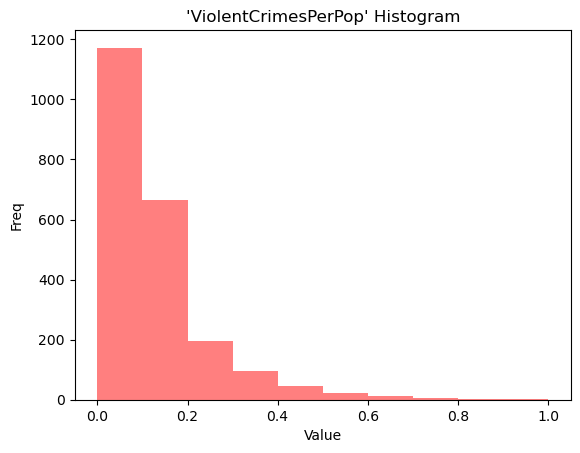

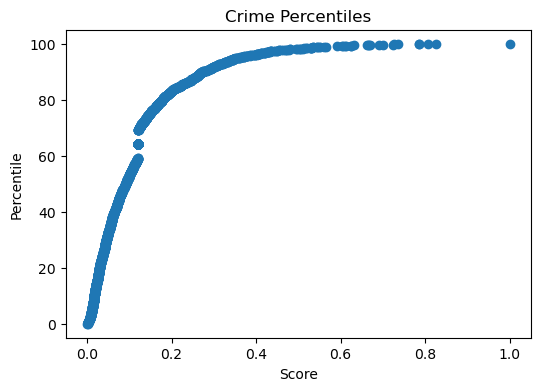

(1549, 100)
(332, 100)
(333, 100)


In [245]:
%run alt_Preprocessing.ipynb

In [246]:
# Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

## Naive Bayes

In [247]:
# Split data and reset x & y to training data for k-fold
x = x_train
y = y_train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Set classes based on classification complexity decided in pre-processing
classes = {'LowCrime': 0, 'HighCrime': 1}

**Gaussian:** 82% accuracy

Parameters:
- priors: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
- var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

In [248]:
# Gaussian Naive Bayes
gnb_model = GaussianNB(priors=None, var_smoothing=1e-9)
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 84.63855421686746


In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       225
         1.0       0.80      0.70      0.75       107

    accuracy                           0.85       332
   macro avg       0.83      0.81      0.82       332
weighted avg       0.84      0.85      0.84       332



TypeError: 'Text' object is not callable

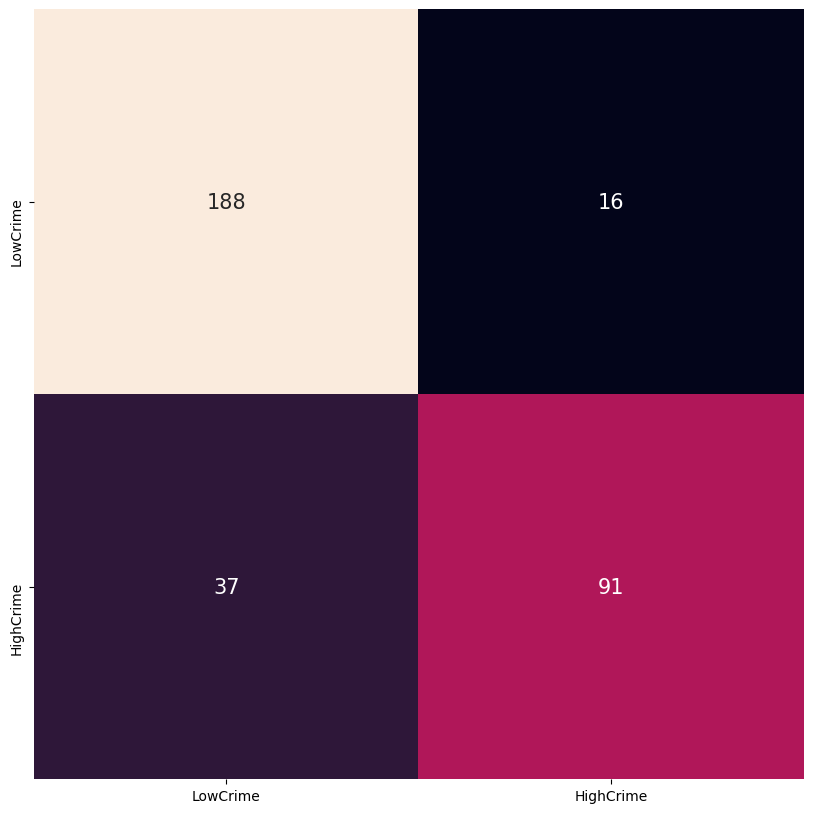

In [268]:
mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=classes, yticklabels=classes, ax=ax, annot_kws={"fontsize":15})
plt.title('Gaussian Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')

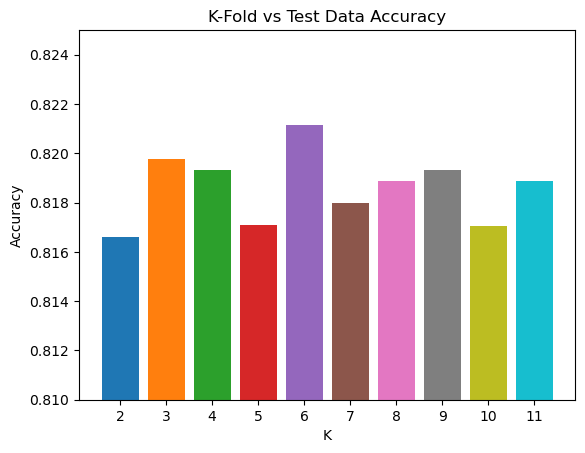

In [251]:
# Perform k-fold split in training and testing data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(gnb_model, x, y, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key)

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.81, 0.825)
plt.show()

In [252]:
# Check k-fold split
kf =KFold(n_splits=6, shuffle=True, random_state=42)
score = cross_val_score(gnb_model, x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')
# Good. Minimal variation.

Scores for each fold are: [0.82113821 0.83739837 0.81842818 0.82113821 0.8102981  0.81842818]
Average score: 0.82
Standard Deviation in score: 0.01


**Multinomial:** 83% accuracy

Parameters:
- alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
- fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
- class_prior: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [253]:
# Multinomial Naive Bayes
m_model = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
m_model.fit(x_train, y_train)
y_pred = m_model.predict(x_test)
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Multinomial Naive Bayes model accuracy(in %): 85.2409638554217


In [254]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       225
         1.0       0.82      0.69      0.75       107

    accuracy                           0.85       332
   macro avg       0.84      0.81      0.82       332
weighted avg       0.85      0.85      0.85       332



Text(98.22222222222221, 0.5, 'predicted label')

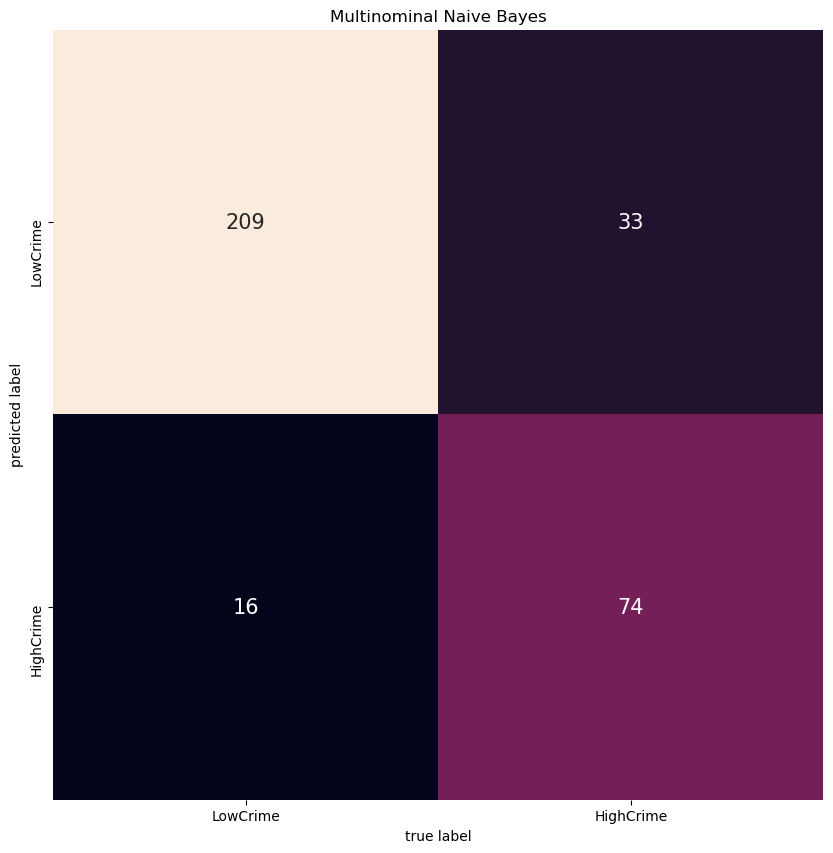

In [255]:
mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=classes, yticklabels=classes, ax=ax, annot_kws={"fontsize":15})
plt.title('Multinominal Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')

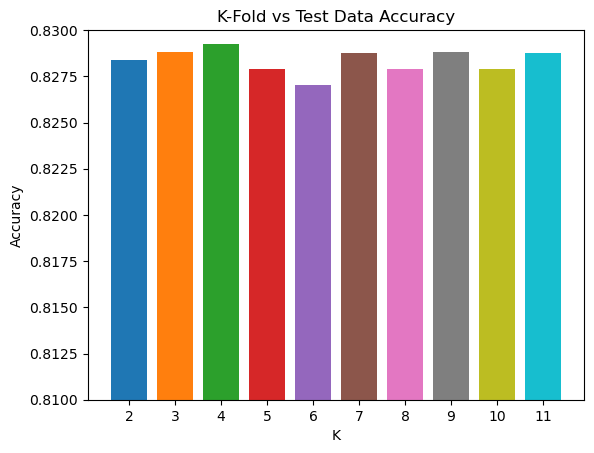

In [256]:
# Perform k-fold split in training and testing data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(m_model, x, y, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key)

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.81, 0.83)
plt.show()

In [257]:
# Check k-fold split
kf =KFold(n_splits=4, shuffle=True, random_state=42)
score = cross_val_score(m_model, x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')
# Too much variation

Scores for each fold are: [0.85920578 0.81949458 0.80470163 0.83363472]
Average score: 0.83
Standard Deviation in score: 0.02


**Bernoulli:** 84% accuracy

Parameters:
- alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
- binarize: Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors.
- fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
- class_prior: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [258]:
# Bernoulli Naive Bayes
b_model = BernoulliNB(alpha=1, binarize=None)
b_model.fit(x_train, y_train)
y_pred = b_model.predict(x_test)
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Bernoulli Naive Bayes model accuracy(in %): 85.2409638554217


In [259]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       225
         1.0       0.78      0.76      0.77       107

    accuracy                           0.85       332
   macro avg       0.83      0.83      0.83       332
weighted avg       0.85      0.85      0.85       332



Text(98.22222222222221, 0.5, 'predicted label')

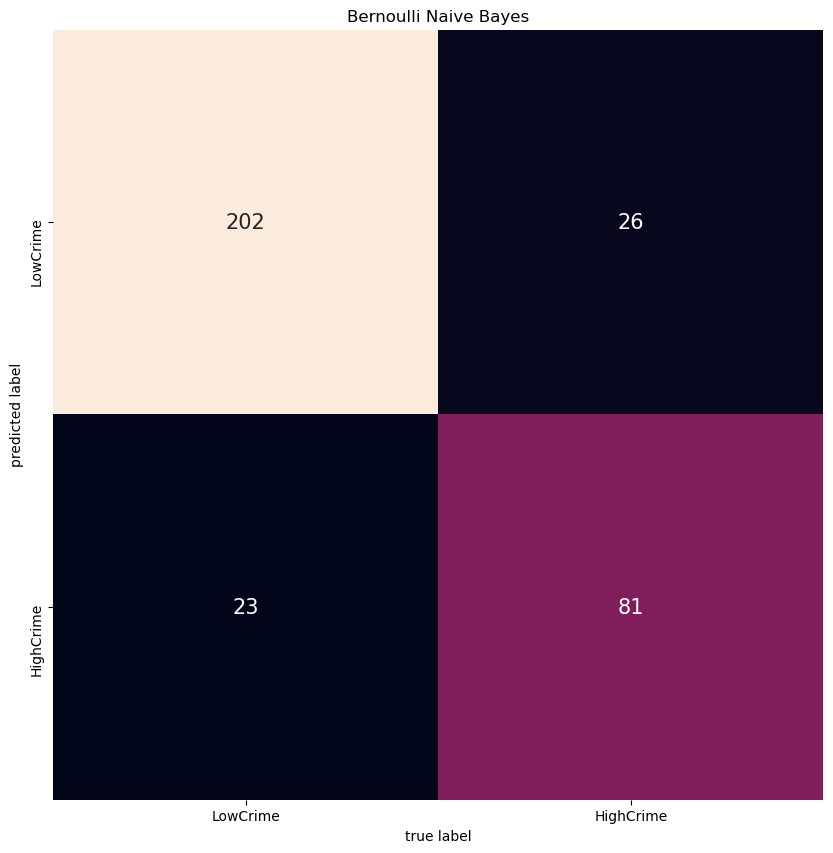

In [260]:
mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=classes, yticklabels=classes, ax=ax, annot_kws={"fontsize":15})
plt.title('Bernoulli Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')

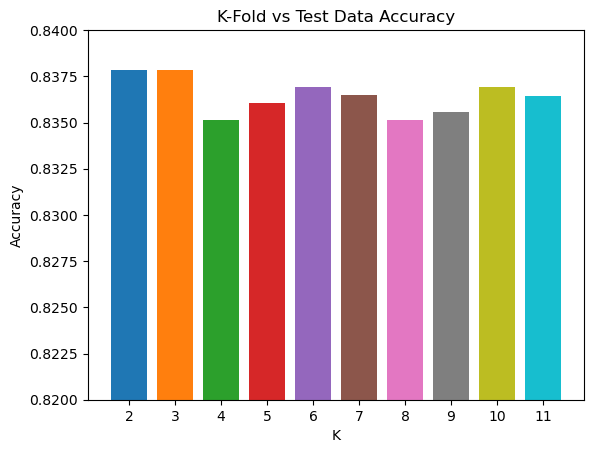

In [261]:
# Perform k-fold split in training and testing data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(b_model, x, y, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key)

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.82, 0.84)
plt.show()

In [262]:
# Check k-fold split
kf =KFold(n_splits=3, shuffle=True, random_state=42)
score = cross_val_score(b_model, x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')
# Not much variation

Scores for each fold are: [0.8604336  0.82791328 0.82520325]
Average score: 0.84
Standard Deviation in score: 0.02


**Complement:** 81% accuracy

Parameters
- alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
- fit_prior: Only used in edge case with a single class in the training set.
- class_prior: Prior probabilities of the classes. Not used.
- norm: Whether or not a second normalization of the weights is performed. The default behavior mirrors the implementations found in Mahout and Weka, which do not follow the full algorithm described in Table 9 of the paper.

In [263]:
# Complement Naive Bayes
c_model = ComplementNB(alpha=1, norm=False)
c_model.fit(x_train, y_train)
y_pred = c_model.predict(x_test)
print("Complement Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Complement Naive Bayes model accuracy(in %): 84.03614457831326


In [264]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       225
         1.0       0.71      0.85      0.77       107

    accuracy                           0.84       332
   macro avg       0.82      0.84      0.83       332
weighted avg       0.85      0.84      0.84       332



Text(98.22222222222221, 0.5, 'predicted label')

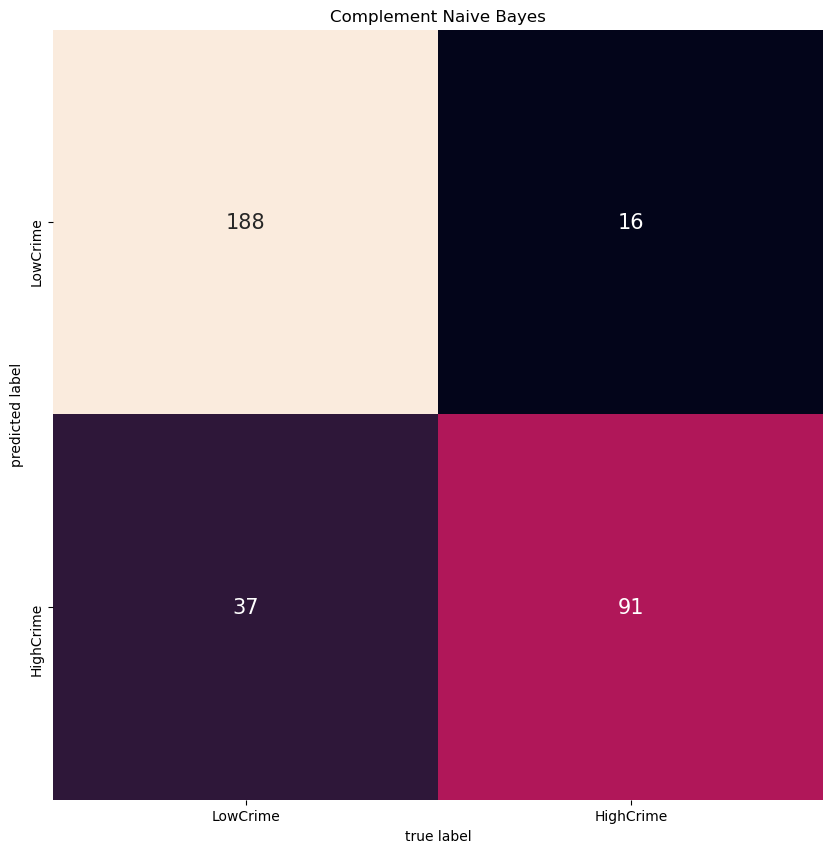

In [265]:
mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=classes, yticklabels=classes, ax=ax, annot_kws={"fontsize":15})
plt.title('Complement Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')

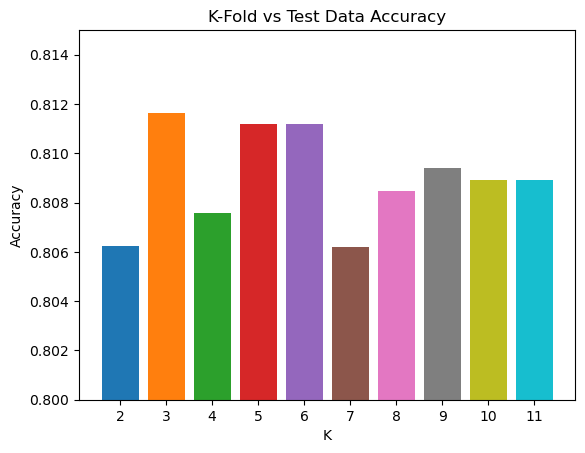

In [266]:
# Perform k-fold split in training and testing data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(c_model, x, y, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key)

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.815)
plt.show()

In [267]:
# Check k-fold split
kf =KFold(n_splits=3, shuffle=True, random_state=42)
score = cross_val_score(c_model, x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')
# Some variation

Scores for each fold are: [0.83468835 0.79403794 0.80623306]
Average score: 0.81
Standard Deviation in score: 0.02
